In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine,reflect=True)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
session = Session(engine)

In [7]:
prev_year = dt.date(2017,8,27) - dt.timedelta(days = 365)
prev_year

datetime.date(2016, 8, 27)

In [10]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=prev_year).all()
print(results)

[('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 0.0), ('2016-10-10', 0.0), ('2016-10-11', 0.0), ('2016-10-12', 0.

In [11]:
df = pd.DataFrame(results, columns=['date','precipitation'])

In [14]:
df.set_index(df['date'],inplace=True)
print(df.to_string(index=False))

       date  precipitation
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 2016-09-28           0.00
 2016-09-29           0.00
 2016-09-30           0.00
 2016-10-01           0.00
 

In [15]:
df=df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2016-08-27           0.00
 2016-08-27           0.12
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-27           0.18
 2016-08-27           0.00
 2016-08-28           0.14
 2016-08-28           0.14
 2016-08-28           2.07
 2016-08-28           0.14
 2016-08-28           0.01
 2016-08-28           0.60
 2016-08-29            NaN
 2016-08-29           0.04
 2016-08-29           0.00
 2016-08-29           0.90
 2016-08-29           0.00
 2016-08-29           0.17
 2016-08-29           0.35
 2016-08-30           0.00
 2016-08-30           0.02
 2016-08-30           0.05
 2016-08-30           0.00
 2016-08-30           0.00
 2016-08-30           0.00
 2016-08-31           2.46
 2016-08-31            NaN
 2016-08-31           0.10
 2016-08-31            NaN
 2016-08-31           0.13
 2016-08-31           0.24
 2016-08-31           0.25
 2016-09-01           0.00
 2016-09-01            NaN
 2016-09-01           0.00
 2016-09-01           0.02
 

<AxesSubplot:xlabel='date'>

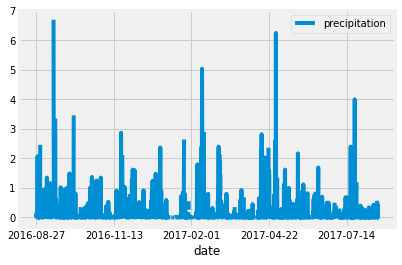

In [16]:
df.plot()

In [17]:
df.describe()

,precipitation
count,1996.000000
mean,0.173146
std,0.454157
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
session.query(func.count(Station.station)).all()

[(9)]

In [31]:
col = session.query(Station.station).all()
col

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [33]:
col = session.query(Measurement).first()
col.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x125448c9508>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [38]:
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [40]:
result = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date>=prev_year).all()
print(result)

[(75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), (65.0,), (68.0,), (62.0,), 

In [43]:
df = pd.DataFrame(result, columns=["tobs"])
df

,tobs
0,75.0
1,73.0
2,78.0
3,77.0
4,78.0
...,...
343,77.0
344,77.0
345,76.0
346,76.0


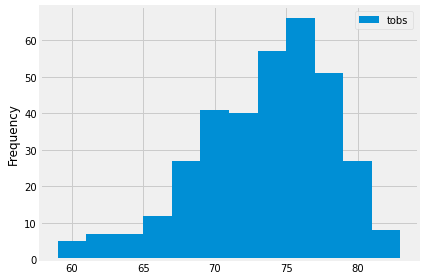

In [48]:
df.plot.hist(bins=12)
plt.tight_layout()